<h2>Tutorial - adiabatic</h2>

In [1]:
from pulser import Pulse, Sequence, Register
from pulser_simulation import Simulation
from pulser.devices import Chadoq2
from pulser.waveforms import InterpolatedWaveform
from pulser_simulation import QutipEmulator
import matplotlib.pyplot as plt
import numpy as np
import random

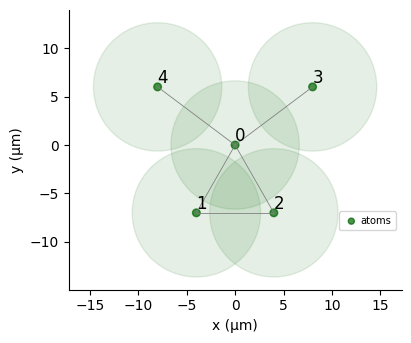

In [2]:
quibits = {
    '0':(0,0),
    '1':(-4,-7),
    '2':(4,-7),
    '3':(8,6),
    '4':(-8,6)
}
reg = Register(quibits)
reg.draw(
    blockade_radius=Chadoq2.rydberg_blockade_radius(1.0),
    draw_graph=True,
    draw_half_radius=True
)

In [3]:
link_max = 10
no_link_min = 13.6

Omega_min = Chadoq2.interaction_coeff / no_link_min**6
Omega_max = Chadoq2.interaction_coeff / link_max**6

Omega = (Omega_min + Omega_max) / 2
delta_0 = -5
delta_f = -delta_0

T = 4500

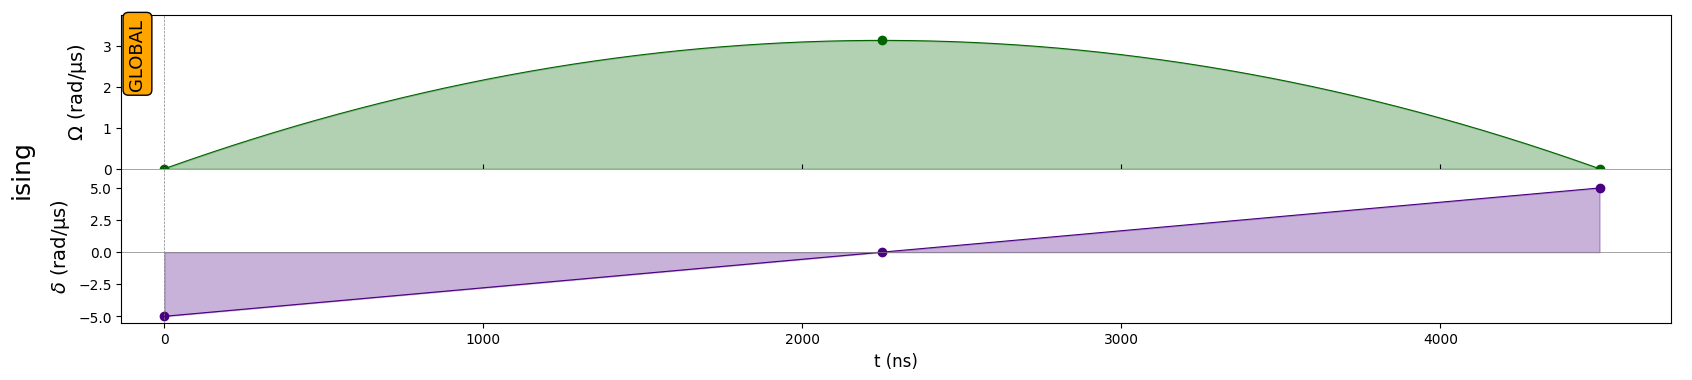

In [4]:
adiabatic_pulse = Pulse(
    InterpolatedWaveform(T, [1e-9, Omega, 1e-9]), # amplitude waveform
    InterpolatedWaveform(T, [delta_0, 0, delta_f]), # detuning waveform
    0, # phase
)

# initialization
seq = Sequence(reg, Chadoq2) # map graph architecture onto device
seq.declare_channel('ising', 'rydberg_global') # declare channel
seq.add(adiabatic_pulse, 'ising') # add pulse to the sequence
seq.draw()

In [5]:
simul  = Simulation(seq)
results = simul.run()
count_dict = results.sample_final_state(N_samples=10000)
count_dict

c:\Users\Ilja\Documents\EPIQEK\.conda\Lib\site-packages\pulser_simulation\simulation.py:1200: DeprecationWarning: The `Simulation` class is deprecated, use `QutipEmulator.from_sequence` instead.
  warnings.warn(


Counter({'01011': 4551,
         '00111': 4498,
         '00011': 463,
         '00101': 143,
         '01010': 126,
         '10000': 66,
         '01001': 60,
         '00110': 58,
         '10001': 9,
         '10010': 8,
         '01000': 5,
         '00010': 4,
         '00000': 3,
         '00100': 3,
         '00001': 2,
         '10011': 1})

In [6]:
def plot_distribution(C):
    C = dict(sorted(C.items(),key=lambda item: item[1], reverse=True))
    indexes = ['01011','00111']
    color_dict = {key: 'r' if key in indexes else 'g' for key in C}
    plt.figure(figsize=(12,6))
    plt.xlabel('bitstrings')
    plt.ylabel('counts')
    plt.bar(C.keys(), C.values(), width=0.5, color=color_dict.values())
    plt.xticks(rotation='vertical')
    plt.show()

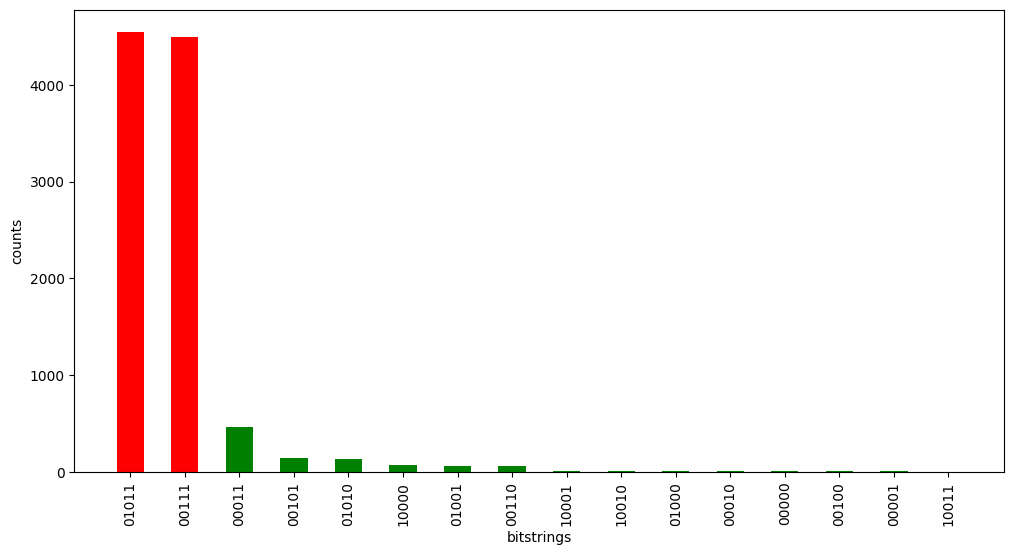

In [7]:
plot_distribution(count_dict)

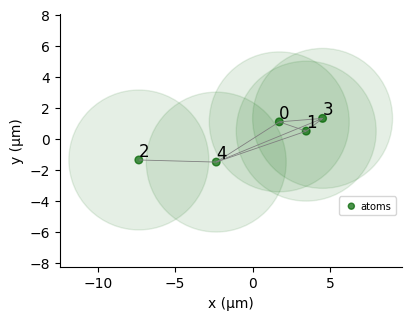

In [8]:
from pulser import Register
from pulser.devices import Chadoq2

coords = np.array([(random.random()*20,random.random()*3) for _ in range(5)])
reg = Register.from_coordinates(coords)
reg.draw(
    blockade_radius=Chadoq2.rydberg_blockade_radius(10.0),
    draw_graph=True,
    draw_half_radius=True,
)